# Introduction:

This Exploratory Data Analysis project explores Universities dataset through the comprehensive series of Data describing, Data Cleaning, Data Visualization, Conducting statistical test and implementation of Linear Regression model inclusing its accuracy. This study focuses on key factors that influence student decision to choose between Private and Public Universities based on various University characteristics. The Overall motive of the project is to derive meaningful insights from these characteristics in order to better understand trends and patterns. 

In [5]:
# importing all the essential libraries for data processing, data manipulation and data visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [9]:
# importing the csv file and printing first few rows to inspect an overview of the data set

df = pd.read_csv("college.csv")
df.head() 

,Institution,Private,Apps,Accept,Enroll,Students,S.F.Ratio,Expend,Grad.Rate,PhD
0,Abilene Christian University,Yes,1660.0,1232.0,721.0,3422.0,18.1,7041.0,60.0,>50
1,Adelphi University,Yes,2186.0,1924.0,512.0,3910.0,12.2,10527.0,56.0,<50
2,Adrian College,Yes,1428.0,1097.0,336.0,1135.0,12.9,8735.0,54.0,>50
3,Agnes Scott College,Yes,417.0,349.0,137.0,573.0,7.7,19016.0,59.0,>50
4,Alaska Pacific University,Yes,193.0,146.0,55.0,1118.0,11.9,10922.0,15.0,>50


In [13]:
# Detailed information about the data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Institution  777 non-null    object 
 1   Private      765 non-null    object 
 2   Apps         775 non-null    float64
 3   Accept       774 non-null    float64
 4   Enroll       772 non-null    float64
 5   Students     776 non-null    float64
 6   S.F.Ratio    774 non-null    float64
 7   Expend       775 non-null    float64
 8   Grad.Rate    774 non-null    float64
 9   PhD          772 non-null    object 
dtypes: float64(7), object(3)
memory usage: 60.8+ KB


# 1. Descriptive Statistics of the Data set

In [18]:
# Generating the descriptive statistics using describe function 
summary = df.describe()

# Displaying the descriptive statistics
print("Descrpitive Statics for the Data set")
summary

Descrpitive Statics for the Data set


,Apps,Accept,Enroll,Students,S.F.Ratio,Expend,Grad.Rate
count,775.000000,774.000000,772.000000,776.000000,774.000000,775.000000,774.000000
mean,3004.927742,2014.164083,781.781088,4550.208763,14.090698,9642.797419,65.449612
std,3874.120093,2447.981568,931.034168,5858.384381,3.965024,5210.996785,17.194855
min,81.000000,72.000000,35.000000,3.000000,2.500000,3186.000000,10.000000
25%,778.000000,601.750000,242.750000,1225.500000,11.500000,6747.500000,53.000000
50%,1558.000000,1109.500000,435.500000,2095.000000,13.600000,8367.000000,65.000000
75%,3635.000000,2418.500000,902.250000,5121.000000,16.500000,10816.000000,78.000000
max,48094.000000,26330.000000,6392.000000,38338.000000,39.800000,56233.000000,118.000000


Observation:

1) Applications received by Universities - 1) Totally 775 universities received applications. 
                                           2) 3005 aplications received on average.
                                           3) The minimum number of applications received varied from 81 to a maximum of 48094.
                                        

2) Applications accepted by Universities - 1) 774 Universities accepted the applications.
                                           2) 2014 applications accepted on average.
                                           3) 2447 showing diversity volume accross universities.
                                           4) The minimum number of applications accepted ranged from 72 to a maximum of 26330.

3) Number of New students enrolled - 1) New students enrolled in nearly 772 universities.
                                     2) On average 781 new students enrolled per University.
                                     3) Count of new students ranges from a minimum of 35 to maximum of 6392.
                                     4) Quartile(75%) most universities enroll fewer than 1000 students.

4) Number of Current and Part time students - 1) Total of 776 universities have both current and part time students.
                                              2) On average of 4550 students enrolled per university.
                                              3) Number of students ranges from a minimum of 3 to maximum of 38338 enrolled per University.
   
5) Student Faculty ratio - 1) Average student faculty ratio is 14 students per faculty member.
                           2) The ratio ranges a minimum of 2 to maximum of 40 students per faculty.

6) Expenditure - 1) Mean expenditure per students is 9642.
                 2) The standard deviation is 5210 indicating high variablity in how much universities spending.
                 3) Minimum 3186 and maximum spending upto 56233 at one university showing that some Universities investing heavily                              in instruction.

7) Graduation rate - 1) The Average graduation rate is 65%.
                     2) Median graduation rate is 65% and 75 percentile is 78%, indicating that 75% universities have graduation rate below                          78%.



                                        

# 2. Find and Handling the missing values

In [24]:
# check for missing values in a dataset

df.isnull().sum()

Institution     0
Private        12
Apps            2
Accept          3
Enroll          5
Students        1
S.F.Ratio       3
Expend          2
Grad.Rate       3
PhD             5
dtype: int64

It shows that except the variable institution all other variables having missing values

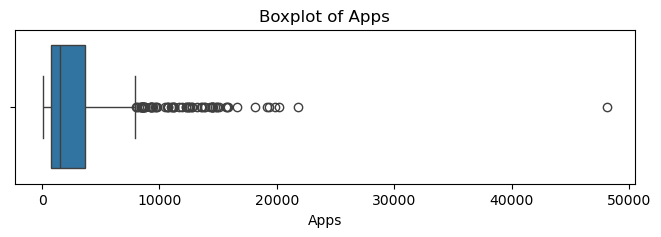

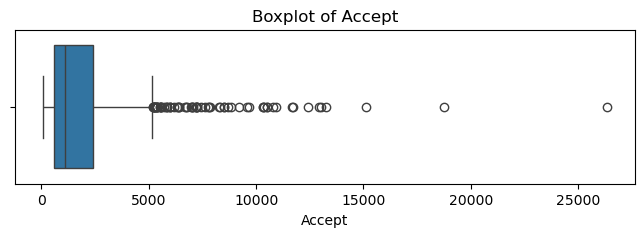

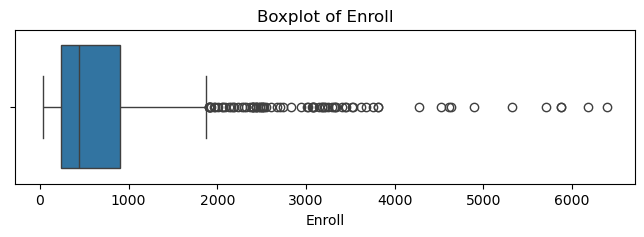

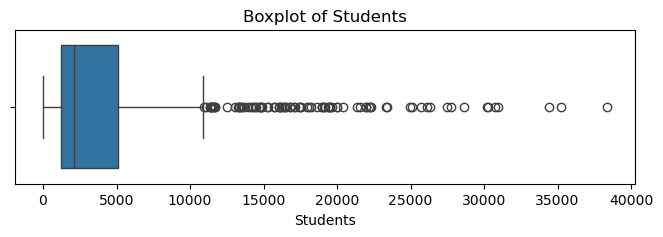

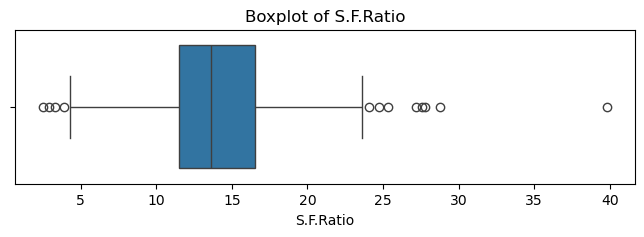

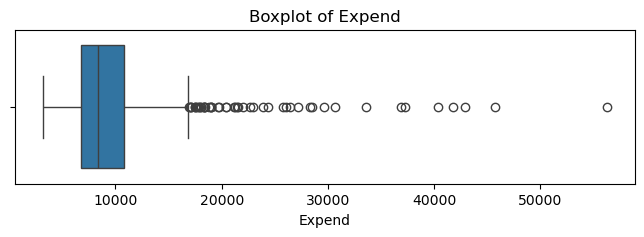

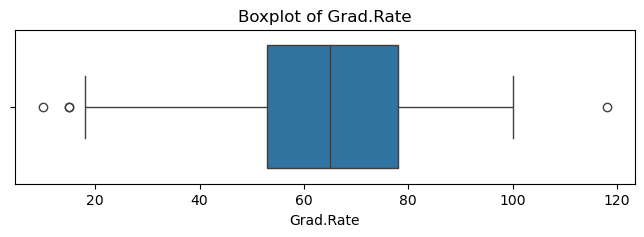

In [29]:
# Boxplot to visualize the distribution of outliers 

num_columns = df.select_dtypes(include = ["float64", "int64"]).columns

for col in num_columns:
    plt.figure(figsize = (8, 2))
    sns.boxplot(x = df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Observation:

Except for Grad.Rate, all variables are right skew with a considerable number of outliers.  As a result, the median is better suited to impute missing values in continuous data and the mode in categorical ones.

In [34]:
# Handling the missing values using median for continuoius numerical variables and mode for categorical variables

for col in df.columns:
    if df[col].dtype in ["float64", "int64"]:
        df[col] = df[col].fillna(df[col].median()) # filling the missing values using median

    else:
        df[col] = df[col].fillna(df[col].mode()[0]) #filling the missing values using mode
        



In [38]:
# checking for missing values after handling

df.isnull().sum()

Institution    0
Private        0
Apps           0
Accept         0
Enroll         0
Students       0
S.F.Ratio      0
Expend         0
Grad.Rate      0
PhD            0
dtype: int64

In [45]:
df.shape

(777, 10)

All the missing datas are filled appropriately by median and mode

# 3. Graph Visualizing

# 3(a). Graphs for one or more continuous variables

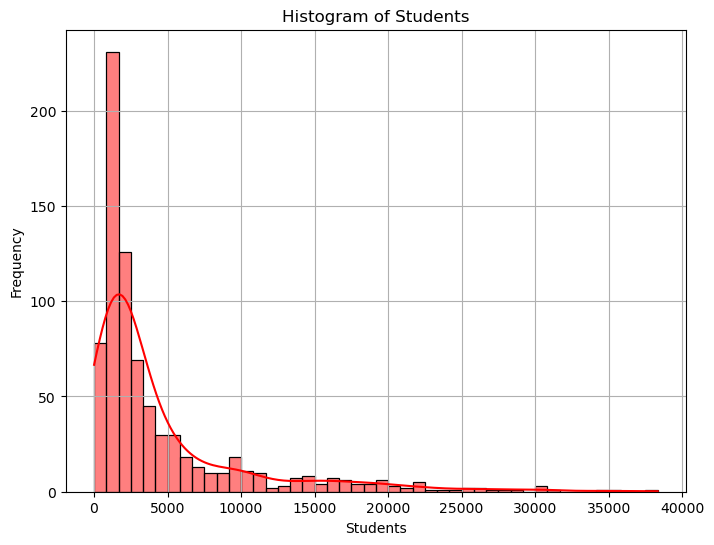

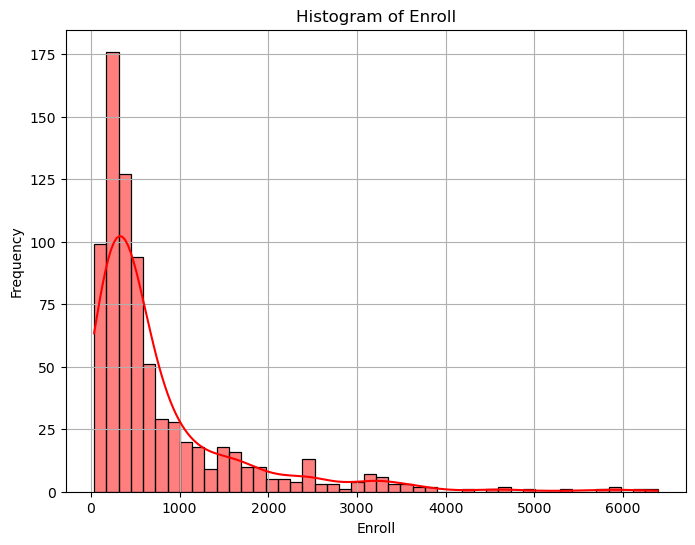

In [51]:
# Distribution of continuous variables(ie,. students and accept) 

continuous_var = df[["Students", "Enroll"]]

for col in continuous_var:
    plt.figure(figsize = (8, 6))
    sns.histplot(df[col], kde = True, color = "red")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()
    

Observation:

Students (Histogram):

1) The Distribution shows that Right skewed (Postively skewed).
2) Most Universities have lower student counts.
3) The tail of distribution indicates that high student counts.
4) As number of student increases, number of universities decreases.


Enroll (Histogram):

1) The Distribution newly enrolled students also Right skewed. The tail of the distribution extends further right .
2) Most of the Universities enroll between 0 to 500.
3) The long tail indicates that only a few universities with large number of enrollment.

# 3(b). Pair of Continuous variables

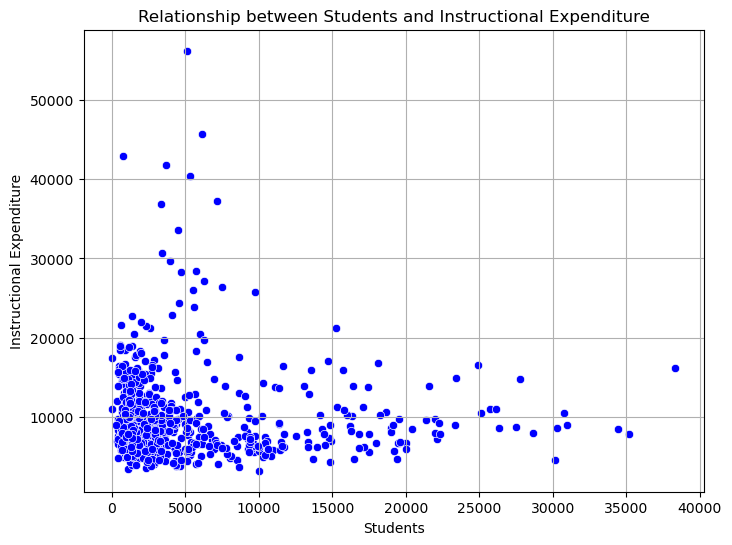

In [57]:
# Distribution of Pair of Continous variables

plt.figure(figsize = (8, 6))
sns.scatterplot(data = df, x = "Students", y = "Expend", color = "blue")
plt.title("Relationship between Students and Instructional Expenditure")
plt.xlabel("Students")
plt.ylabel("Instructional Expenditure")
plt.grid(True)
plt.show()


Observation (Scatter plot):

1) The majority of the Universities has the student range between 0-10000.
2) Not a strong Negative correlation between the student and Instructional Expenditure. The relationship is highly varied esspecially among smaller universities.
3) As students number decreases the instructional expenditure increases. Larger universities with over 15000 students considerably have less instructional expenditure.

# 3(c). Association between Categorical varaibale and Numerical variable

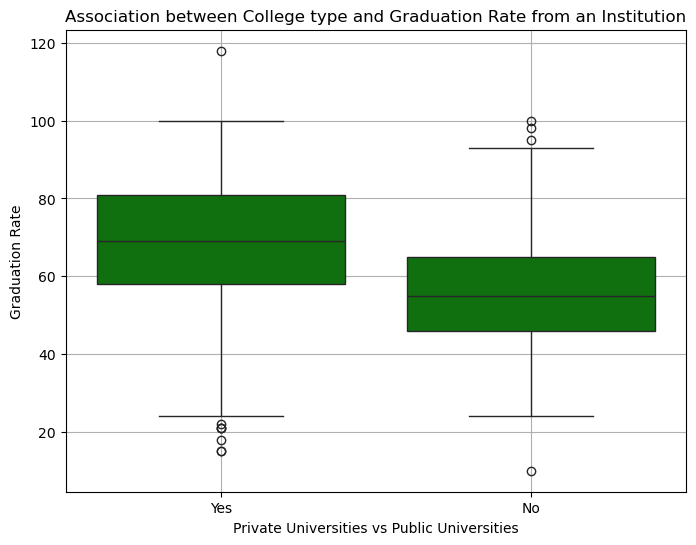

In [63]:
# Distribution of Association between Categorical varaibale and Numerical variable

plt.figure(figsize = (8, 6))
sns.boxplot(data = df, x = "Private", y = "Grad.Rate", color = "green")
plt.title("Association between College type and Graduation Rate from an Institution")
plt.xlabel("Private Universities vs Public Universities")
plt.ylabel("Graduation Rate")
plt.grid(True)
plt.show()



Observation (Box plot):

1) Private Universities have higher graduation rates compare to the  public universities with an average rate of 69 and the median is 70.
2) Public Universities have lesser graduation rates compare to the Private universities averaging 56 with a median of 55.

Outliers:

Both type of Universities has outliers. Private Universities have few graduation rates below 20 and one near to 120. Whereas Public Universities have one near 100 and one outlier below 20.

# 3(D). Relationship between more than two variables

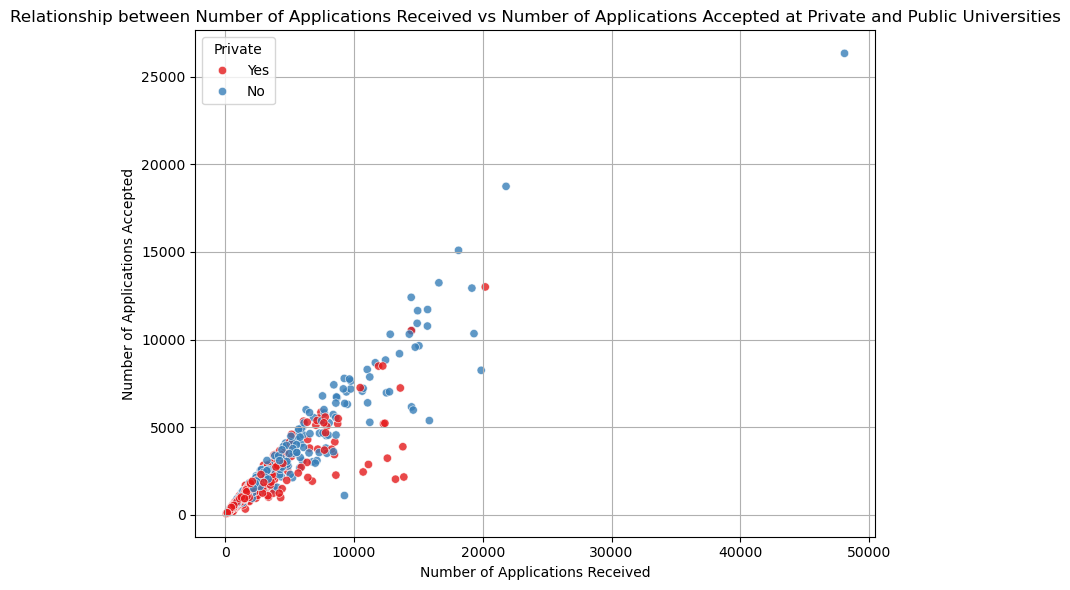

In [69]:
# Distribution of Relationship between more than two variables

plt.figure(figsize = (8, 6))
sns.scatterplot(data = df, x = "Apps", y = "Accept", hue = "Private", palette = "Set1", alpha = 0.8)
plt.title("Relationship between Number of Applications Received vs Number of Applications Accepted at Private and Public Universities")
plt.xlabel("Number of Applications Received")
plt.ylabel("Number of Applications Accepted")
plt.grid(True)
plt.tight_layout()
plt.show()


Observation (Scatter Plot):

1) There is a positive relationship received and accepted more applications.
2) Private universities receive and accept fewer applications than public universities with numbers ranging from 0 to 13000. This suggests that private universities use tight procedures when screening applicants.
3) Blue dots (public universities) are more spread over the graph indicating that public universities receive and accept a higher number of applications. Some Public universities process huge number of applications.

Outliers:

The notable outlier is Public University, that received 50000 applications and accepted 25000.



# 4. Unique values categorical variable and their Frequencies

# 4.1. Unique values of PhD column

In [76]:
# Displaying the unique values and their frequencies of PhD column categorical variable 

df.PhD.value_counts()

PhD
>50    697
<50     80
Name: count, dtype: int64

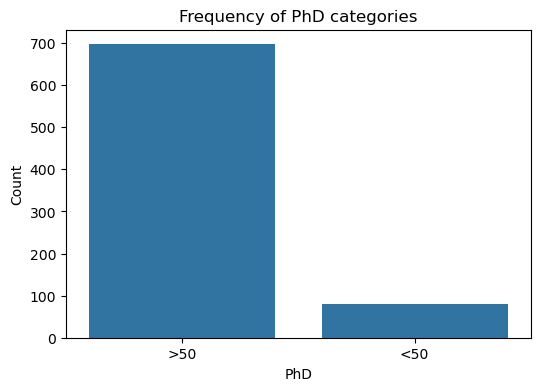

In [80]:
# Plots to visualize the distribution of Frequency of PhD categories

plt.figure(figsize = (6, 4))
sns.countplot(x = "PhD", data = df)
plt.title("Frequency of PhD categories")
plt.xlabel("PhD")
plt.ylabel("Count")
plt.show()

Observation: 

697 Universities having the percentage of faculty with Ph.D.'s is over 50%. 80 Universities having the percentage of faculty with Ph.D.'s is under 50%

# 4.2. Unique values of Private column

In [86]:
# Displaying the unique values and their frequencies of Private column categorical variable 

df.Private.value_counts()

Private
Yes    566
No     211
Name: count, dtype: int64

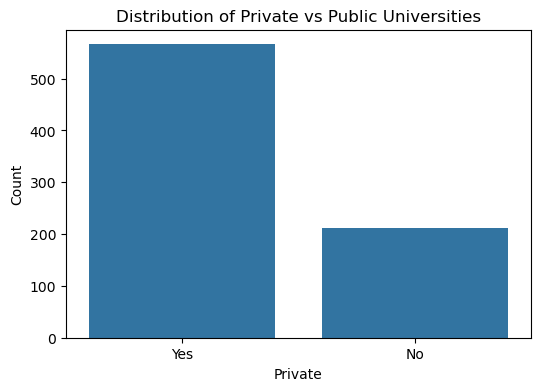

In [90]:
# Plots to visualize the distribution of Frequency of Private vs Public Universities

plt.figure(figsize = (6, 4))
sns.countplot(x = "Private", data = df)
plt.title("Distribution of Private vs Public Universities")
plt.xlabel("Private")
plt.ylabel("Count")
plt.show()

Observation :

Out of 777 Universities, 566 are private and 211 are public.


# 5. Contingency table and Statistical Test

# 5.1. Contingency table

In [97]:
# Creates a contingency table for two categorical variables
contingency_table = pd.crosstab(df.Private, df.PhD)

# Displaying the Contingency table
print("Contingency Table:")
print(contingency_table)


Contingency Table:
PhD      <50  >50
Private          
No        12  199
Yes       68  498


Observation:

In majority both types of universities have over 50% of Ph.d faculty (Public 199, Private 498), indicating strong academic profile across Universities.

# 5.2. Chi-Square Test

In [103]:
# Conducting the chi-square test on Contingency table created
chi2, pVal, dof, exp = chi2_contingency(contingency_table)

# Displaying the results
print("\nChi-Square Test Results:")
print(f"chi2 Statistics: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {pVal}")


Chi-Square Test Results:
chi2 Statistics: 5.994248875294777
Degrees of Freedom: 1
P-value: 0.014352590870496059


Observation:

Null Hypothesis - Ther is no association between type of universities and proportion of PhD faculty.
P-value = 0.0143525. Since the P-value is less than 0.05, which we reject the null hypothesis.
The chi-square test shows that the proportion of faculties with PhDs differs considerably across private and public Universities (p = 0.014). Thus, faculty qualification levels appear to be linked to institution type.

# 6. Subset of two rows and their Descriptive statistics

In [109]:
# Filtering the code as only private universities and Graduation rate more than 50
sub_1 = df[(df["Private"] == "Yes") & (df["Grad.Rate"] > 50)]

# Displaying the results
print("Private collages with Grad Rate > 50:\n")
print(sub_1.describe())

Private collages with Grad Rate > 50:

               Apps        Accept       Enroll      Students   S.F.Ratio  \
count    494.000000    494.000000   494.000000    494.000000  494.000000   
mean    2108.534413   1377.402834   469.438259   2316.251012   12.771053   
std     2505.705338   1377.479547   421.185115   2132.494258    3.276184   
min       81.000000     72.000000    35.000000      3.000000    2.500000   
25%      696.750000    557.250000   222.500000   1132.000000   11.100000   
50%     1253.000000    953.000000   360.000000   1689.000000   12.700000   
75%     2352.500000   1699.500000   536.750000   2711.500000   14.300000   
max    20192.000000  13007.000000  3810.000000  18652.000000   27.800000   

             Expend   Grad.Rate  
count    494.000000  494.000000  
mean   10744.317814   73.123482  
std     5733.610150   13.081076  
min     3186.000000   51.000000  
25%     7651.250000   63.000000  
50%     9084.000000   72.000000  
75%    11799.000000   83.000000  
max 

In [113]:
# Filtering the code as only Public universities and Graduation rate more than 50
sub_2 = df[(df["Private"] == "No") & (df["Grad.Rate"] > 50)]

# Displaying the results
print("Public collages with Grad Rate > 50:\n")
print(sub_2.describe())

Public collages with Grad Rate > 50:

               Apps        Accept       Enroll      Students   S.F.Ratio  \
count    137.000000    137.000000   137.000000    137.000000  137.000000   
mean    7036.715328   4679.383212  1874.335766  11216.197080   17.137956   
std     6042.877510   3906.040518  1390.007666   7911.686815    3.379113   
min      233.000000    233.000000   153.000000    716.000000    7.800000   
25%     3041.000000   2047.000000   814.000000   5259.000000   15.100000   
50%     5785.000000   3539.000000  1549.000000   9356.000000   17.400000   
75%     9251.000000   6383.000000  2546.000000  16255.000000   19.200000   
max    48094.000000  26330.000000  6392.000000  35206.000000   28.800000   

             Expend   Grad.Rate  
count    137.000000  137.000000  
mean    7776.773723   64.014599  
std     2726.730015   10.817324  
min     3871.000000   51.000000  
25%     5935.000000   56.000000  
50%     6971.000000   63.000000  
75%     8837.000000   70.000000  
max  

Observation:

1) Compare to Private Universities, Public Universities are larger in terms of receiving and accepting an applications.
2) In the mean of Graduation rate between two universities Private has a higher graduation rate. The mean of Private Universities graduation rate is 73 whereas Public Universities graduation rate is 64.


# 7. statistical test of the significance of the difference between the means of two subsets of the data 

In [119]:
# Extracting the variable from sub_1, sub_2 and assigning to m_1, m2 to compare with Students column

m_1 = sub_1["Students"] # Private Universities with the graduation rate more than 50
m_2 = sub_2["Students"] # Public Universities with the graduation rate of more than 50

# Performing t-test
t_stat, p_value = ttest_ind(m_1, m_2, equal_var = False)

# Displaying the results
print(f"T-statistic: {t_stat:}")
print(f"P-Value: {p_value:}")

# Interpreting the results
if p_value < 0.05:
    print("The mean number of students differs significantly between the two subsets.")

else:
    print("The mean number of students does not differs significantly between the two subsets.")

T-statistic: -13.036079111896385
P-Value: 5.171788257126053e-26
The mean number of students differs significantly between the two subsets.


Observation:

Since, the p-value(5.171788257126053e-26) is less than 0.05 we reject null hypothesis. Which means the difference in the mean number of the students between public universities and private universities is statistically significant.

There is statistically significant difference in the average number of students at public and private universities with graduation rate exceeds 50. In this category, Public Universities enroll significantly more students than Private Universities.


# 8. Summarized information of Grouped data

In [125]:
# Groups by whether the university is Private or Public University

df.groupby("Private").agg({"Apps":["count", "mean", "median", "min", "max"],  # multiple aggregate functions
                           "Accept": ["count", "mean", "median", "min", "max"],
                           "Grad.Rate": ["count", "mean", "median", "min", "max"]}).reset_index() # resets the index into regular columns

Private  Apps                                     Accept               \
          count        mean  median    min      max  count         mean   
0      No   211  5742.28436  4345.0  233.0  48094.0    211  3896.774882   
1     Yes   566  1979.35159  1152.5   81.0  20192.0    566  1307.547703   

                          Grad.Rate                                 
   median    min      max     count       mean median   min    max  
0  2900.0  233.0  26330.0       211  56.018957   55.0  10.0  100.0  
1   861.5   72.0  13007.0       566  68.962898   69.0  15.0  118.0

Observation:

Public Universities recieved and accepted more applicants but have lower graduation rate compared to Private Universities which recieved and accepted less applications.

In [130]:
# Groups by PhD (University faculties with over 50% or below)

df.groupby("PhD").agg({"Apps":["count", "mean", "median", "min", "max"],
                           "Accept": ["count", "mean", "median", "min", "max"],
                           "Students": ["count", "mean", "median", "min", "max"]}).reset_index() # resets the index into regular columns

PhD  Apps                                      Accept                       \
       count         mean  median    min      max  count         mean  median   
0  <50    80   945.612500   600.5  100.0   5187.0     80   760.750000   490.0   
1  >50   697  3237.139168  1742.0   81.0  48094.0    697  2154.134146  1264.0   

                 Students                                       
    min      max    count         mean  median    min      max  
0  90.0   4471.0       80  1790.287500  1399.0  304.0   9496.0  
1  72.0  26330.0      697  4863.463415  2248.0    3.0  38338.0

Observation:

Universities with over >50% PhD holding faculty tend to receive more and accepts more applications and enroll more students this suggest, that a strong positive association between Faculty qualification and University popularity among the students.

# 9. Linear Regression model and its Accuracy

Aim: The aim of the model is to predict how many student applications accepted based on how many students applied.

In [137]:

x = df[["Apps"]] # Independent Variable.
y = df["Accept"] # Dependent Variable.

# splitting the data into train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 42) # Train size 80% and Test size 20%

# Fit the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)


y_predict = model.predict(x_test) # Predicts the test set

r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)  # Evalute the model perfomance


# Displaying the model results

print(f"R-Squared(Accuracy): {r2:}")
print(f"Mean Squared Error): {mse:}")

print(f"Intercept: {model.intercept_:}")
print(f"Coefficient: {model.coef_[0]:}")



R-Squared(Accuracy): 0.8373994811328026
Mean Squared Error): 921821.4253685611
Intercept: 217.01794081540947
Coefficient: 0.5931636612582363


Observartion:

Intercept and Coefficient:

Intercept equals 217.01794081540947.  This indicates that even if a university receives no applications, it will accept 217 applications, which is impossible in the actual world.  This is particularly common in regression models. In reality, this is not practical, but it is  necessary to fit the line mathematically.

Coefficient is 0.5931636612582363.  This indicates that for every new applications, 0.593 more applications will be accepted.

R-squared equals 83.7% (0.8373994811328026).  The R squared score indicates a high association between applications received and accepted. The number of applications received accounts for 83.7% of the change in the number of admitted students.

Mean Squared Error: 921821.4253685611. This figure represents the average squared difference between the actual and expected results.

Overall, this Linear Regression model is an excellent predictor of the number of applications accepted based on the number of applications received by universities.



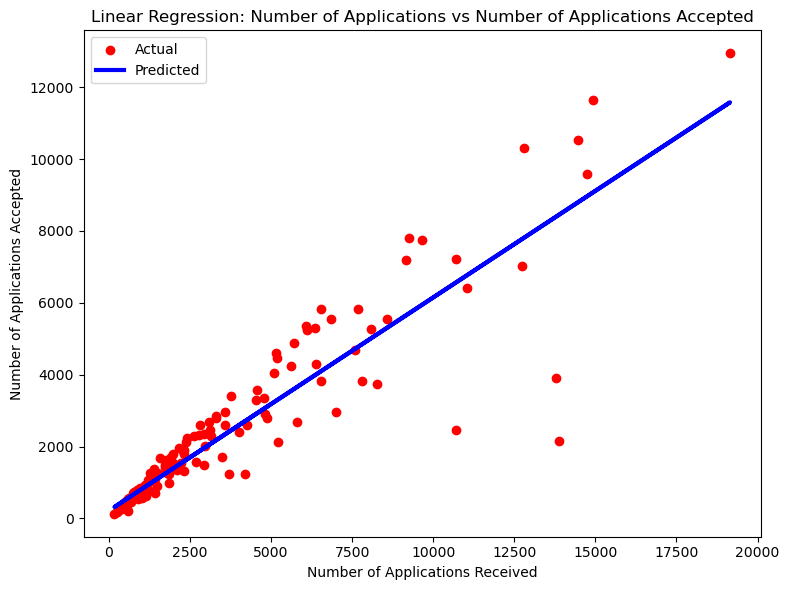

In [142]:
# Distribution of actual values with predicted values

plt.figure(figsize = (8,6))
plt.scatter(x_test, y_test, color = "red", label = "Actual")
plt.plot(x_test, y_predict, color = "blue", linewidth = 3, label = "Predicted")
plt.title("Linear Regression: Number of Applications vs Number of Applications Accepted")
plt.xlabel("Number of Applications Received")
plt.ylabel("Number of Applications Accepted")
plt.legend()
plt.tight_layout()
plt.show()
           

Observation:

This graph shows that strong positive Linear relationship between Number of Applications received and Number of Applications accepted. As number of applications increases number of applications accepted also increases.


# Conclusion:

This Project involved in depth of analysis of statistical and analytical exploration of U.S. Universities data set to extract the insights from Student applications, Acceptence, New enrollment, Student Faculty ration, Graduation rate and Infrastructural Expenditures.

Key Findings and Learnings.

1) After handling the missing values no missing values were found in the data and its ready for the statistical and analytical explorations. 

2) Most of the U.S.Universities has the percentage of faculties with Ph.D.'s over 50%. Exactly 199 Public universities having the percentage of faculties with Ph.D.'s over 50% and 498 Private Universities having the percentage of faculties with Ph.D.'s over 50%. This leads to the existence of highly qualified academic staff in the United States.

3) Public universities are significantly larger in terms of receiving and accepting applications. In terms of Graduation rate the Private Universities slightly perform better (Average - 73%) compared to Public Universities (Average 64%).

4) In the chi-square test shows the proportion of faculties with PhDs differs considerably across private and public Universities. Thus, faculty qualification levels appear to be linked to institution type.

5) In the statistical test there is statistically significant difference in the average number of students at public and private universities with graduation rate exceeds 50. With this we can say that both private and public universities in the U.S. doing good academic wise.

6) In groupby aggregations, we can see that private institutions recruit fewer applicants and have a greater graduation rate than public universities. Universities with Ph.D faculties exceeding 50% receiving a high number of applications and acceptances.

7) Linear Regression produces the model outcome of a strong positive linear relationship.